# Correlació entre les dades

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
DataSet = pd.read_csv("../LOL - Dataset/games.csv")

# Primer mirem quines són totalment identiques
duplicated_rows = DataSet[DataSet.duplicated(keep=False)]
num_duplicated_rows = len(duplicated_rows)
print(f"Nombre de files duplicades: {num_duplicated_rows} de {len(DataSet)}")

# Si n'hi ha, les eliminem
DataSet_cleaned = DataSet.drop_duplicates()
print(f"Nombre de files després d'eliminar duplicades: {len(DataSet_cleaned)}")

DataSet_cleaned.head(10)

Nombre de files duplicades: 861 de 51490
Nombre de files després d'eliminar duplicades: 51053


,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18
5,3287435705,1501667992132,2059,9,1,2,2,1,1,2,...,6,0,0,3,0,119,134,154,63,31
6,3314215542,1503430065724,1993,9,1,1,2,1,1,1,...,2,0,0,0,0,75,42,31,40,429
7,3329224025,1504472363684,1334,9,1,1,1,0,0,2,...,0,0,0,2,0,157,38,122,40,238
8,3318040883,1503686577549,1387,9,2,2,2,2,0,2,...,8,1,0,2,1,28,51,53,157,40
9,3327786881,1504385918871,2681,9,2,2,2,2,2,2,...,8,3,1,2,0,64,141,84,67,53


In [3]:
DataSet_champions = pd.read_json("../LOL - Dataset/champion_info_2.json", orient='inline')
DataSet_champions.head(10)

,type,version,data
None,champion,7.18.1,"{'tags': [], 'title': 'None', 'id': -1, 'key':..."
MonkeyKing,champion,7.18.1,"{'tags': ['Fighter', 'Tank'], 'title': 'the Mo..."
Jax,champion,7.18.1,"{'tags': ['Fighter', 'Assassin'], 'title': 'Gr..."
Fiddlesticks,champion,7.18.1,"{'tags': ['Mage', 'Support'], 'title': 'the Ha..."
Shaco,champion,7.18.1,"{'tags': ['Assassin'], 'title': 'the Demon Jes..."
Warwick,champion,7.18.1,"{'tags': ['Fighter', 'Tank'], 'title': 'the Un..."
Xayah,champion,7.18.1,"{'tags': ['Marksman'], 'title': 'the Rebel', '..."
Nidalee,champion,7.18.1,"{'tags': ['Assassin', 'Fighter'], 'title': 'th..."
Zyra,champion,7.18.1,"{'tags': ['Mage', 'Support'], 'title': 'Rise o..."
Kled,champion,7.18.1,"{'tags': ['Fighter', 'Tank'], 'title': 'the Ca..."


In [4]:

def crear_matriu_correlacio(df, target_attribute='winner', figsize=(12, 10)):
    
    # Filtrar només columnes numèriques
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    df_numeric = df[numeric_columns]
    
    print("=" * 60)
    print("MATRIU DE CORRELACIÓ - ANÀLISI COMPLET")
    print("=" * 60)
    
    # 1. MATRIU DE CORRELACIÓ COMPLETA
    corr_matrix = df_numeric.corr()
    
    plt.figure(figsize=figsize)
    
    # Màscara per amagar la triangular superior (opcional)
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    # Heatmap de correlacions
    sns.heatmap(corr_matrix, 
                mask=mask,
                annot=True, 
                cmap='coolwarm', 
                center=0,
                fmt='.2f',
                square=True,
                cbar_kws={"shrink": .8})
    
    plt.title('Matriu de Correlacions - Variables Numèriques', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
    
    # 2. CORRELACIONS AMB EL TARGET (MÉS IMPORTANT)
    if target_attribute in df_numeric.columns:
        print(f"\n{'='*50}")
        print(f"CORRELACIONS AMB EL TARGET: {target_attribute}")
        print(f"{'='*50}")
        
        # Ordenar correlacions amb el target
        target_correlations = corr_matrix[target_attribute].sort_values(ascending=False)
        
        # Crear DataFrame per mostrar resultats
        target_corr_df = pd.DataFrame({
            'Variable': target_correlations.index,
            'Correlació': target_correlations.values
        })
        
        # Eliminar la correlació del target amb si mateix
        target_corr_df = target_corr_df[target_corr_df['Variable'] != target_attribute]
        
        print(target_corr_df.to_string(index=False))
        
        # Gràfic de correlacions amb el target
        plt.figure(figsize=(10, 6))
        colors = ['red' if x < 0 else 'green' for x in target_corr_df['Correlació']]
        bars = plt.barh(target_corr_df['Variable'], target_corr_df['Correlació'], color=colors, alpha=0.7)
        
        plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
        plt.axvline(x=0.3, color='blue', linestyle='--', alpha=0.5, label='Correlació moderada')
        plt.axvline(x=-0.3, color='blue', linestyle='--', alpha=0.5)
        plt.axvline(x=0.5, color='red', linestyle='--', alpha=0.5, label='Correlació forta')
        plt.axvline(x=-0.5, color='red', linestyle='--', alpha=0.5)
        
        # Afegir valors a les barres
        for bar, value in zip(bars, target_corr_df['Correlació']):
            plt.text(bar.get_width() + (0.01 if value >= 0 else -0.03), 
                    bar.get_y() + bar.get_height()/2, 
                    f'{value:.3f}', 
                    ha='left' if value >= 0 else 'right', 
                    va='center',
                    fontweight='bold')
        
        plt.xlabel('Coeficient de Correlació (Pearson)')
        plt.title(f'Correlacions de les Variables amb {target_attribute}', fontsize=14, fontweight='bold')
        plt.legend()
        plt.grid(axis='x', alpha=0.3)
        plt.tight_layout()
        plt.show()
    
    # 3. ANÀLISI DE CORRELACIONS FORTES ENTRE VARIABLES
    print(f"\n{'='*50}")
    print("CORRELACIONS FORTES ENTRE VARIABLES (multicol·linealitat)")
    print(f"{'='*50}")
    
    # Trobar correlacions fortes (excloent autocorrelacions)
    strong_correlations = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_value = corr_matrix.iloc[i, j]
            if abs(corr_value) > 0.5:  # Llindar per correlació forta
                strong_correlations.append({
                    'Variable 1': corr_matrix.columns[i],
                    'Variable 2': corr_matrix.columns[j],
                    'Correlació': corr_value
                })
    
    if strong_correlations:
        strong_corr_df = pd.DataFrame(strong_correlations)
        strong_corr_df = strong_corr_df.sort_values('Correlació', key=abs, ascending=False)
        print("Correlacions fortes (> |0.5|) entre variables:")
        print(strong_corr_df.to_string(index=False))
    else:
        print("No s'han trobat correlacions fortes (> |0.5|) entre variables")
    
    # 4. RESUM DE LES VARIABLES MÉS RELLEVANTS
    if target_attribute in df_numeric.columns:
        print(f"\n{'='*50}")
        print("RESUM - VARIABLES MÉS RELLEVANTS PER AL MODEL")
        print(f"{'='*50}")
        
        # Variables amb correlació forta amb el target
        strong_target_corr = target_corr_df[abs(target_corr_df['Correlació']) > 0.05]
        
        if not strong_target_corr.empty:
            print("Variables amb correlació forta/moderada amb el target (|r| > 0.05):")
            for _, row in strong_target_corr.iterrows():
                direction = "positiva" if row['Correlació'] > 0 else "negativa"
                print(f"  - {row['Variable']}: {row['Correlació']:.3f} ({direction})")
        else:
            print("Cap variable mostra correlació forta amb el target (|r| > 0.3)")
        
        # Variables amb baixa correlació amb el target
        weak_target_corr = target_corr_df[abs(target_corr_df['Correlació']) < 0.05]
        if not weak_target_corr.empty:
            print(f"\nVariables amb baixa correlació amb el target (|r| < 0.05):")
            for _, row in weak_target_corr.iterrows():
                print(f"  - {row['Variable']}: {row['Correlació']:.3f}")
    
    return corr_matrix

In [5]:
import ast
from collections.abc import Iterable

def obtenir_champion_object(champion_id):
    """
    Retorna l'objecte (dict) del champion des de DataSet_champions donat un championID.
    Si s'hi passa un iterable (llista, Series...), retorna una llista d'objectes.
    Retorna None per ids no trobats.
    """
    # Cachejar un mapping id -> objecte per rendiment
    if not hasattr(obtenir_champion_object, "_id_map"):
        col = DataSet_champions['data']
        def to_dict(v):
            if isinstance(v, dict):
                return v
            try:
                return ast.literal_eval(v)
            except Exception:
                return None
        id_map = {}
        for item in col.map(to_dict):
            if isinstance(item, dict) and 'id' in item:
                try:
                    id_map[int(item['id'])] = item
                except Exception:
                    pass
        obtenir_champion_object._id_map = id_map

    id_map = obtenir_champion_object._id_map

    # Iterable (excloent strings)
    if isinstance(champion_id, Iterable) and not isinstance(champion_id, (str, bytes)):
        return [id_map.get(int(i)) if pd.notna(i) else None for i in champion_id]

    # Single id
    try:
        return id_map.get(int(champion_id))
    except Exception:
        return None


### Matriu de correlació


MATRIU DE CORRELACIÓ - ANÀLISI COMPLET


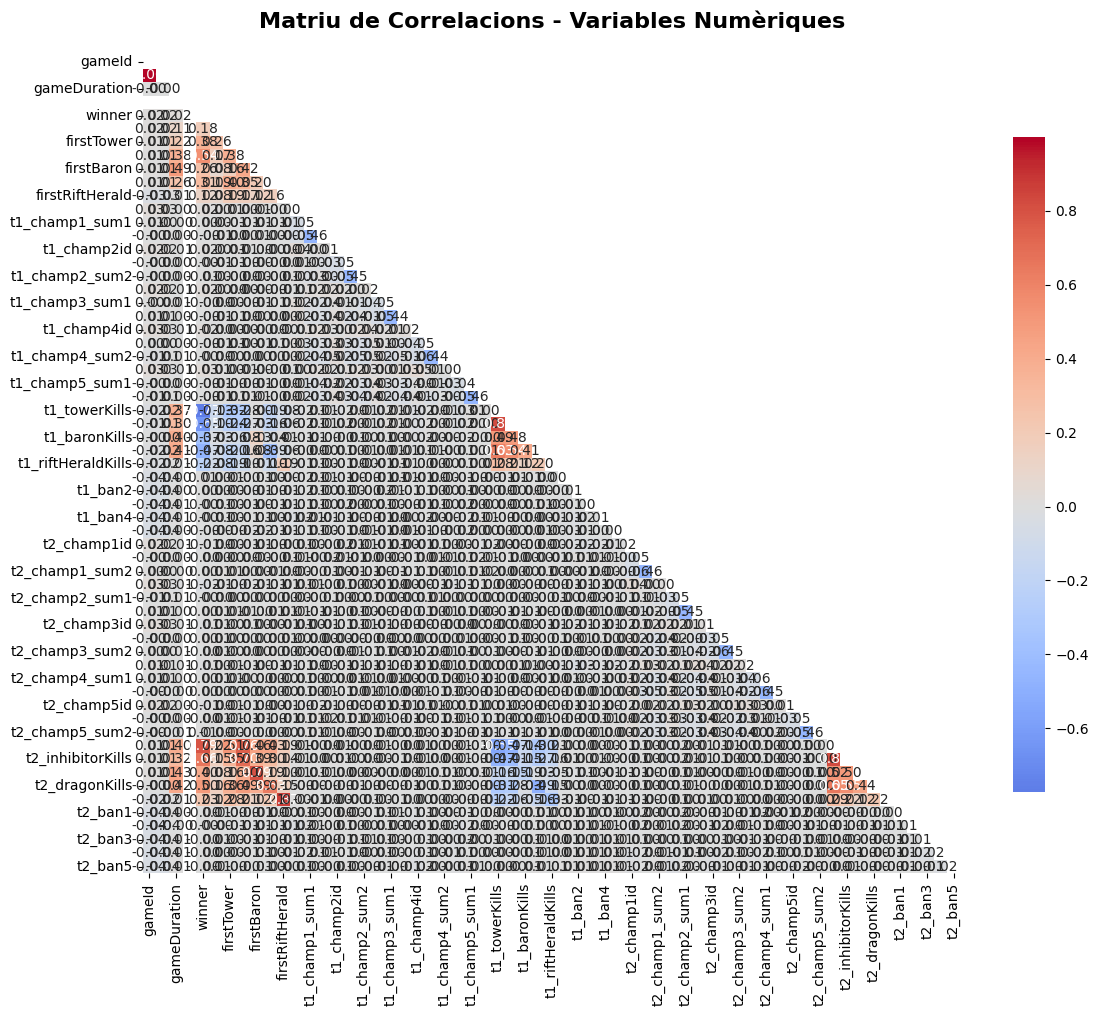


CORRELACIONS AMB EL TARGET: winner
          Variable  Correlació
     t2_towerKills    0.785722
 t2_inhibitorKills    0.660696
    firstInhibitor    0.536404
    t2_dragonKills    0.497055
     t2_baronKills    0.398692
        firstTower    0.376347
       firstDragon    0.310220
        firstBaron    0.261336
t2_riftHeraldKills    0.226131
        firstBlood    0.175564
   firstRiftHerald    0.119891
       t1_champ5id    0.026107
      gameDuration    0.023514
       t1_champ3id    0.020409
       t1_champ1id    0.018570
       t1_champ4id    0.017609
       t1_champ2id    0.015798
      creationTime    0.015167
            gameId    0.015016
           t1_ban1    0.007404
    t2_champ5_sum2    0.005591
    t2_champ3_sum1    0.004981
    t2_champ2_sum2    0.003784
    t2_champ4_sum2    0.003584
           t1_ban4    0.003186
           t1_ban3    0.003141
    t1_champ2_sum1    0.003062
    t2_champ2_sum1    0.002646
           t1_ban2    0.001394
    t2_champ1_sum2    0.001073
   

posx and posy should be finite values
posx and posy should be finite values


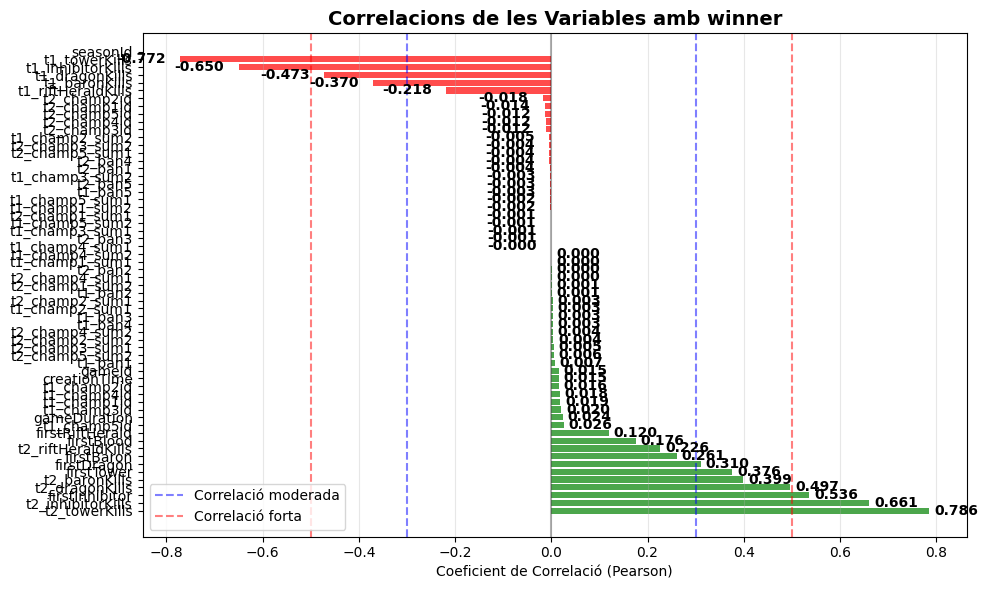


CORRELACIONS FORTES ENTRE VARIABLES (multicol·linealitat)
Correlacions fortes (> |0.5|) entre variables:
       Variable 1         Variable 2  Correlació
           gameId       creationTime    0.999866
  firstRiftHerald t2_riftHeraldKills    0.866861
    t2_towerKills  t2_inhibitorKills    0.826064
    t1_towerKills  t1_inhibitorKills    0.824581
       firstBaron      t2_baronKills    0.793116
           winner      t2_towerKills    0.785722
           winner      t1_towerKills   -0.771571
   firstInhibitor      t2_towerKills    0.755575
   firstInhibitor  t2_inhibitorKills    0.700099
           winner  t2_inhibitorKills    0.660696
           winner  t1_inhibitorKills   -0.649636
    t2_towerKills     t2_dragonKills    0.648053
      firstDragon     t2_dragonKills    0.629829
    t1_towerKills     t1_dragonKills    0.626911
    t1_towerKills      t2_towerKills   -0.548947
t2_inhibitorKills     t2_dragonKills    0.548121
t1_inhibitorKills     t1_dragonKills    0.538541
           w

In [6]:
# Executar anàlisi de correlacions 
corr_matrix = crear_matriu_correlacio(DataSet_cleaned, target_attribute='winner')

Actualment, ara tenim una vista més general sobre les relacions que cadascuna de les variables té amb el **target="winner"**, a més, les correlacions entre elles mateixes també, amb un **llindar de 0.5**.

Puc entendre perquè l'anàlisi no ha tingut en compte els diferents campions, ja que aquest joc és tracta d'estrategia en equip, la millor manera és poder crear una columna extra per poder representar les diferents combinacions possibles de cadascun dels equips.



In [7]:
def comptar_combinacions_equip(df):
    """
    Comptar totes les combinacions de campions per equips (tant t1 com t2) en el DataFrame.
    Retorna un diccionari {combinacio_tuple_sorted: recompte} on la mateixa combinació
    (ordre no importa) s'agrupa independentment de si apareix a l'equip 1 o 2.
    Per cada partida, si ambdós equips tenen exactament la mateixa combinació, 
    només s'incrementa una vegada (no es compta duplicat dins la mateixa fila).
    """
    from collections import Counter

    team1_cols = [f't1_champ{i}id' for i in range(1, 6)]
    team2_cols = [f't2_champ{i}id' for i in range(1, 6)]

    combinacions_counter = Counter()

    def _sorted_tuple_from_cols(row, cols):
        vals = [row[c] for c in cols if pd.notna(row[c])]
        if len(vals) == 0:
            return None
        # assegurem ints i ordre insensible
        try:
            vals_int = tuple(sorted(int(v) for v in vals))
        except Exception:
            return None
        return vals_int

    for _, row in df.iterrows():
        comb1 = _sorted_tuple_from_cols(row, team1_cols)
        comb2 = _sorted_tuple_from_cols(row, team2_cols)

        # evitem comptar dues vegades la mateixa combinació dins la mateixa partida
        combos_a_afegir = {c for c in (comb1, comb2) if c is not None}

        for comb in combos_a_afegir:
            combinacions_counter[comb] += 1

    return dict(combinacions_counter)


combinacions_equip = comptar_combinacions_equip(DataSet_cleaned)
print(f"Nombre de combinacions úniques d'equips trobades: {len(combinacions_equip)}")

combinacions_equip

Nombre de combinacions úniques d'equips trobades: 101449


{(104, 122, 238, 412, 498): 1,
 (8, 11, 96, 112, 432): 1,
 (10, 35, 39, 76, 119): 1,
 (25, 54, 92, 120, 157): 1,
 (22, 24, 69, 126, 412): 1,
 (18, 38, 68, 141, 267): 1,
 (19, 22, 90, 92, 412): 2,
 (29, 36, 57, 61, 63): 1,
 (37, 38, 51, 59, 141): 1,
 (19, 29, 40, 119, 134): 1,
 (24, 40, 45, 67, 141): 1,
 (2, 12, 15, 92, 245): 1,
 (17, 18, 57, 74, 412): 1,
 (19, 21, 53, 114, 161): 1,
 (16, 79, 90, 150, 498): 1,
 (57, 64, 67, 112, 497): 1,
 (29, 59, 63, 99, 141): 1,
 (18, 57, 111, 161, 267): 1,
 (11, 75, 131, 427, 429): 1,
 (35, 74, 86, 99, 110): 1,
 (57, 99, 111, 143, 236): 1,
 (7, 10, 18, 89, 105): 1,
 (4, 22, 33, 53, 157): 1,
 (21, 32, 101, 114, 432): 1,
 (5, 11, 15, 40, 238): 1,
 (22, 37, 79, 86, 105): 1,
 (1, 64, 81, 84, 202): 1,
 (7, 24, 51, 143, 421): 1,
 (40, 92, 103, 141, 498): 2,
 (24, 29, 64, 99, 134): 2,
 (16, 18, 23, 32, 55): 1,
 (15, 40, 64, 103, 150): 1,
 (5, 40, 67, 92, 268): 1,
 (16, 82, 105, 113, 202): 1,
 (23, 31, 37, 61, 222): 1,
 (40, 81, 114, 119, 245): 1,
 (17, 50, 

In [8]:
# Creem un nou DataFrame amb els index de les combinacions d'equips 1 i 2 
combinacions_equip_list = list(combinacions_equip.keys())
combinacions_df = pd.DataFrame(combinacions_equip_list, columns=['champ1_id', 'champ2_id', 'champ3_id', 'champ4_id', 'champ5_id'])
combinacions_df

,champ1_id,champ2_id,champ3_id,champ4_id,champ5_id
0,104,122,238,412,498
1,8,11,96,112,432
2,10,35,39,76,119
3,25,54,92,120,157
4,22,24,69,126,412
...,...,...,...,...,...
101444,1,33,43,99,119
101445,11,21,25,30,56
101446,99,121,201,236,420
101447,1,89,113,164,202


In [9]:
# Optimització: evitar iteracions per fila i fer matching mitjançant claus vectoritzades
# Creem una clau textual per a cada combinació a combinacions_df (si no existeix)
key_cols = ['champ1_id','champ2_id','champ3_id','champ4_id','champ5_id']
if '_key' not in combinacions_df.columns:
    combinacions_df['_key'] = combinacions_df[key_cols].astype(int).astype(str).agg('-'.join, axis=1)

# Map de clau -> index (ràpid per .map)
_key_to_index = pd.Series(combinacions_df.index.values, index=combinacions_df['_key']).to_dict()

# Funció auxiliar per generar sèries de claus a partir de les 5 columnes d'un equip
def _make_team_keys(df, cols):
    arr = df[cols].values.astype(int)            # (n_rows, 5)
    arr_sorted = np.sort(arr, axis=1)            # ordenar cada fila
    keys = pd.DataFrame(arr_sorted).astype(str).agg('-'.join, axis=1)
    return keys

team1_cols = [f't1_champ{i}id' for i in range(1, 6)]
team2_cols = [f't2_champ{i}id' for i in range(1, 6)]

keys1 = _make_team_keys(DataSet_cleaned, team1_cols)
keys2 = _make_team_keys(DataSet_cleaned, team2_cols)

# Mappejar les claus als indexos dels combinacions_df; convertir a Int64 per preservar NA
DataSet_cleaned['team1_comb_index'] = keys1.map(_key_to_index).astype('Int64')
DataSet_cleaned['team2_comb_index'] = keys2.map(_key_to_index).astype('Int64')

DataSet_with_combinations = DataSet_cleaned  # mantenim nom anterior
DataSet_with_combinations.head(10)


C:\Users\Laia\AppData\Local\Temp\ipykernel_4424\2383339997.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataSet_cleaned['team1_comb_index'] = keys1.map(_key_to_index).astype('Int64')
C:\Users\Laia\AppData\Local\Temp\ipykernel_4424\2383339997.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataSet_cleaned['team2_comb_index'] = keys2.map(_key_to_index).astype('Int64')


,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5,team1_comb_index,team2_comb_index
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,0,1,1,114,67,43,16,51,1,0
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,0,0,0,11,67,238,51,420,2,3
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,0,1,0,157,238,121,57,28,5,4
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,164,18,141,40,51,7,6
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,0,1,0,86,11,201,122,18,9,8
5,3287435705,1501667992132,2059,9,1,2,2,1,1,2,...,0,3,0,119,134,154,63,31,10,11
6,3314215542,1503430065724,1993,9,1,1,2,1,1,1,...,0,0,0,75,42,31,40,429,12,13
7,3329224025,1504472363684,1334,9,1,1,1,0,0,2,...,0,2,0,157,38,122,40,238,14,15
8,3318040883,1503686577549,1387,9,2,2,2,2,0,2,...,0,2,1,28,51,53,157,40,17,16
9,3327786881,1504385918871,2681,9,2,2,2,2,2,2,...,1,2,0,64,141,84,67,53,18,19


En aquest nou dataset amb l'index de les combinacions eliminem tots els *t**x**_champ**y**id* i intentem un altre vegada l'anàlisi anterior

In [10]:
# Eliminar les columnes dels id de campions

cols_to_remove = [f't{team}_champ{i}id' for team in [1, 2] for i in range(1, 6)]

DataSet_reduced = DataSet_with_combinations.drop(columns=cols_to_remove)

DataSet_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51053 entries, 0 to 51489
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gameId              51053 non-null  int64
 1   creationTime        51053 non-null  int64
 2   gameDuration        51053 non-null  int64
 3   seasonId            51053 non-null  int64
 4   winner              51053 non-null  int64
 5   firstBlood          51053 non-null  int64
 6   firstTower          51053 non-null  int64
 7   firstInhibitor      51053 non-null  int64
 8   firstBaron          51053 non-null  int64
 9   firstDragon         51053 non-null  int64
 10  firstRiftHerald     51053 non-null  int64
 11  t1_champ1_sum1      51053 non-null  int64
 12  t1_champ1_sum2      51053 non-null  int64
 13  t1_champ2_sum1      51053 non-null  int64
 14  t1_champ2_sum2      51053 non-null  int64
 15  t1_champ3_sum1      51053 non-null  int64
 16  t1_champ3_sum2      51053 non-null  int64
 17

## Segon anàlisi de les correlacions

MATRIU DE CORRELACIÓ - ANÀLISI COMPLET


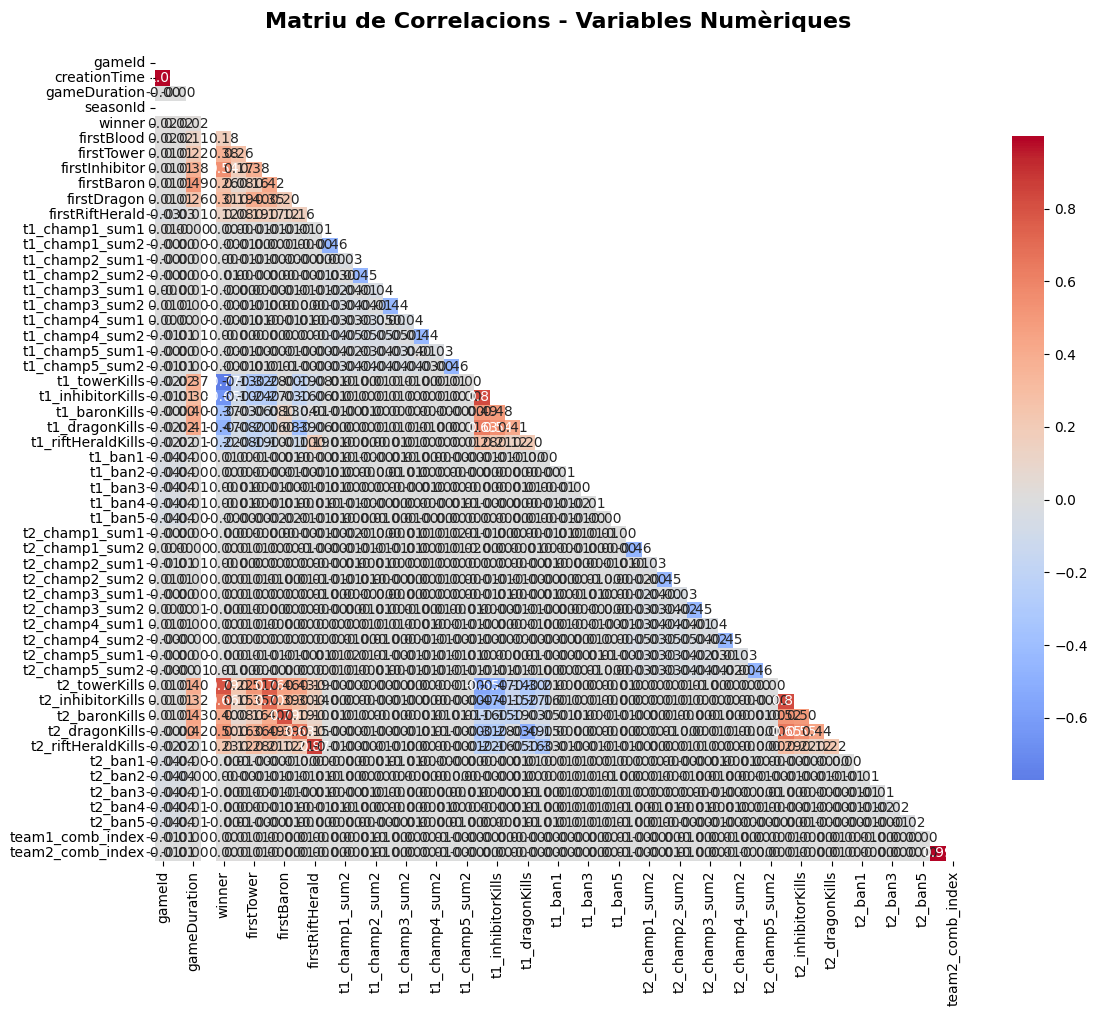


CORRELACIONS AMB EL TARGET: winner
          Variable  Correlació
     t2_towerKills    0.785722
 t2_inhibitorKills    0.660696
    firstInhibitor    0.536404
    t2_dragonKills    0.497055
     t2_baronKills    0.398692
        firstTower    0.376347
       firstDragon    0.310220
        firstBaron    0.261336
t2_riftHeraldKills    0.226131
        firstBlood    0.175564
   firstRiftHerald    0.119891
      gameDuration    0.023514
      creationTime    0.015167
            gameId    0.015016
           t1_ban1    0.007404
    t2_champ5_sum2    0.005591
    t2_champ3_sum1    0.004981
    t2_champ2_sum2    0.003784
  team1_comb_index    0.003701
    t2_champ4_sum2    0.003584
  team2_comb_index    0.003499
           t1_ban4    0.003186
           t1_ban3    0.003141
    t1_champ2_sum1    0.003062
    t2_champ2_sum1    0.002646
           t1_ban2    0.001394
    t2_champ1_sum2    0.001073
    t2_champ4_sum1    0.000498
           t2_ban2    0.000443
    t1_champ1_sum1    0.000348
   

posx and posy should be finite values
posx and posy should be finite values


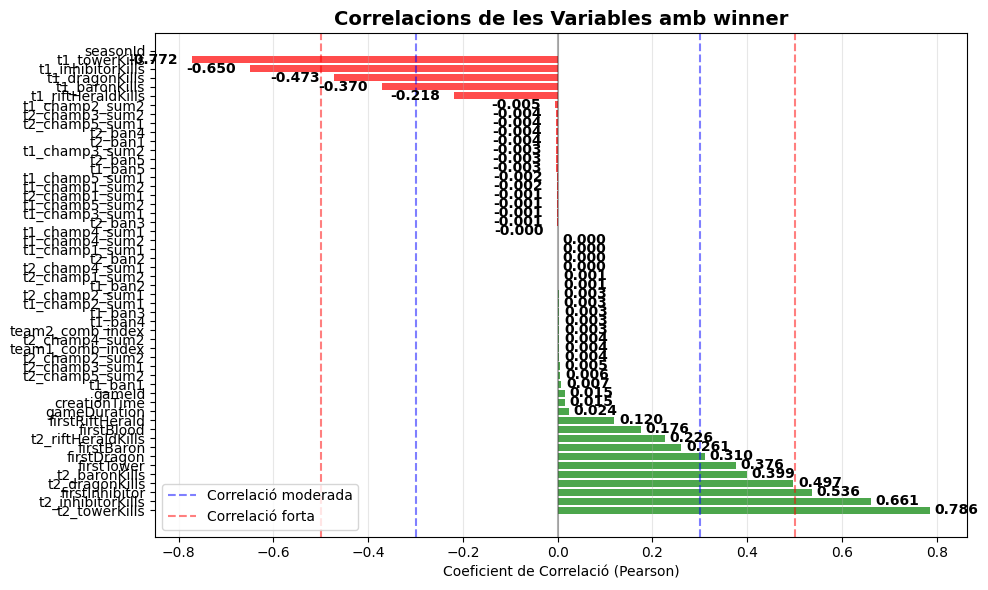


CORRELACIONS FORTES ENTRE VARIABLES (multicol·linealitat)
Correlacions fortes (> |0.5|) entre variables:
       Variable 1         Variable 2  Correlació
           gameId       creationTime    0.999866
 team1_comb_index   team2_comb_index    0.986384
  firstRiftHerald t2_riftHeraldKills    0.866861
    t2_towerKills  t2_inhibitorKills    0.826064
    t1_towerKills  t1_inhibitorKills    0.824581
       firstBaron      t2_baronKills    0.793116
           winner      t2_towerKills    0.785722
           winner      t1_towerKills   -0.771571
   firstInhibitor      t2_towerKills    0.755575
   firstInhibitor  t2_inhibitorKills    0.700099
           winner  t2_inhibitorKills    0.660696
           winner  t1_inhibitorKills   -0.649636
    t2_towerKills     t2_dragonKills    0.648053
      firstDragon     t2_dragonKills    0.629829
    t1_towerKills     t1_dragonKills    0.626911
    t1_towerKills      t2_towerKills   -0.548947
t2_inhibitorKills     t2_dragonKills    0.548121
t1_inhibitor

In [11]:
# Executar anàlisi de correlacions 
corr_matrix = crear_matriu_correlacio(DataSet_reduced, target_attribute='winner')

Principalment no crec que doni alguna gran canvi de les dades la combinació dels tipus de campions un altre camí que podria trobar és mirar els tags de cadascun dels campions participant en una partida i mirar les dades i correlacions.

Aquest camí ho podem trobar en el document **Tags heoris.ipynb**

Un altre camí seria comparar els encataments, però això esta en el document comentat anteriorment.

De moment exploraré les dades sense tenir en compte els encataments com a part rellevants de les dades. 


In [12]:
# Eliminar les columnes amb una baixa correlació amb el target

cols_to_remove = [f't{team}_champ{champ}_sum{s}' for team in [1, 2] for champ in range(1, 6) for s in [1,2]]
cols_to_remove += [f't{team}_ban{champ}' for team in [1, 2] for champ in range(1, 6)]

DataSet_final = DataSet_reduced.drop(columns=cols_to_remove)
DataSet_final.head(10)

DataSet_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51053 entries, 0 to 51489
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gameId              51053 non-null  int64
 1   creationTime        51053 non-null  int64
 2   gameDuration        51053 non-null  int64
 3   seasonId            51053 non-null  int64
 4   winner              51053 non-null  int64
 5   firstBlood          51053 non-null  int64
 6   firstTower          51053 non-null  int64
 7   firstInhibitor      51053 non-null  int64
 8   firstBaron          51053 non-null  int64
 9   firstDragon         51053 non-null  int64
 10  firstRiftHerald     51053 non-null  int64
 11  t1_towerKills       51053 non-null  int64
 12  t1_inhibitorKills   51053 non-null  int64
 13  t1_baronKills       51053 non-null  int64
 14  t1_dragonKills      51053 non-null  int64
 15  t1_riftHeraldKills  51053 non-null  int64
 16  t2_towerKills       51053 non-null  int64
 17

### Tercera correlació 

MATRIU DE CORRELACIÓ - ANÀLISI COMPLET


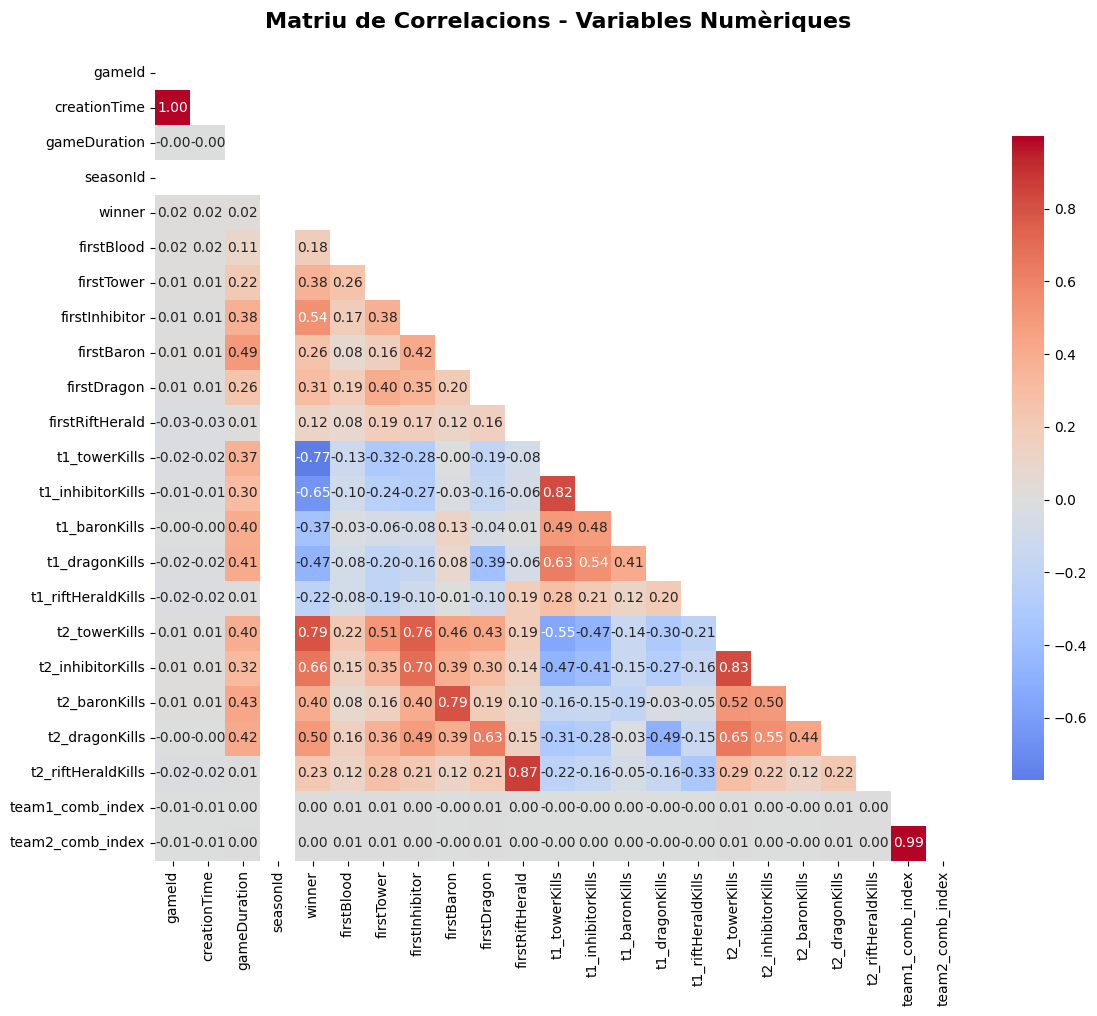

posx and posy should be finite values



CORRELACIONS AMB EL TARGET: winner
          Variable  Correlació
     t2_towerKills    0.785722
 t2_inhibitorKills    0.660696
    firstInhibitor    0.536404
    t2_dragonKills    0.497055
     t2_baronKills    0.398692
        firstTower    0.376347
       firstDragon    0.310220
        firstBaron    0.261336
t2_riftHeraldKills    0.226131
        firstBlood    0.175564
   firstRiftHerald    0.119891
      gameDuration    0.023514
      creationTime    0.015167
            gameId    0.015016
  team1_comb_index    0.003701
  team2_comb_index    0.003499
t1_riftHeraldKills   -0.218057
     t1_baronKills   -0.369883
    t1_dragonKills   -0.472635
 t1_inhibitorKills   -0.649636
     t1_towerKills   -0.771571
          seasonId         NaN


posx and posy should be finite values


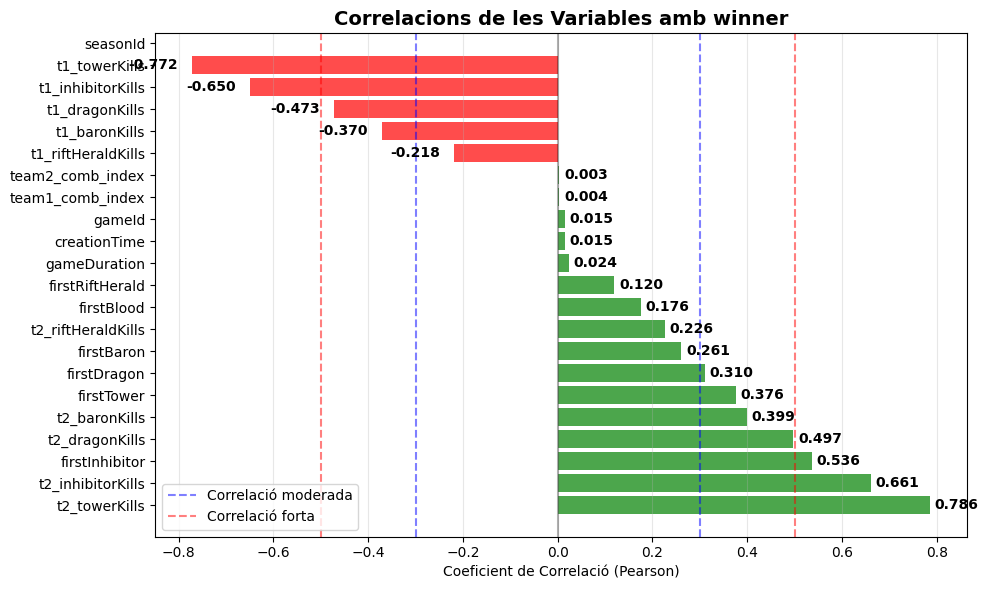


CORRELACIONS FORTES ENTRE VARIABLES (multicol·linealitat)
Correlacions fortes (> |0.5|) entre variables:
       Variable 1         Variable 2  Correlació
           gameId       creationTime    0.999866
 team1_comb_index   team2_comb_index    0.986384
  firstRiftHerald t2_riftHeraldKills    0.866861
    t2_towerKills  t2_inhibitorKills    0.826064
    t1_towerKills  t1_inhibitorKills    0.824581
       firstBaron      t2_baronKills    0.793116
           winner      t2_towerKills    0.785722
           winner      t1_towerKills   -0.771571
   firstInhibitor      t2_towerKills    0.755575
   firstInhibitor  t2_inhibitorKills    0.700099
           winner  t2_inhibitorKills    0.660696
           winner  t1_inhibitorKills   -0.649636
    t2_towerKills     t2_dragonKills    0.648053
      firstDragon     t2_dragonKills    0.629829
    t1_towerKills     t1_dragonKills    0.626911
    t1_towerKills      t2_towerKills   -0.548947
t2_inhibitorKills     t2_dragonKills    0.548121
t1_inhibitor

: 

In [ ]:
# Executar anàlisi de correlacions 
corr_matrix = crear_matriu_correlacio(DataSet_final, target_attribute='winner')

### Conclussions fins al moment
Crec que amb l'eliminació de les columnes fins al moment ens han filtrat molt les dades, és a dir, em eliminat totes aquestes dades que no tenen una relació directa amb les dades